
Ridge Regression Evaluation:
Mean Squared Error (MSE): 15.6967
Mean Absolute Error (MAE): 2.9575
R-squared (R2 Score): 0.9415

Lasso Regression Evaluation:
Mean Squared Error (MSE): 15.7533
Mean Absolute Error (MAE): 2.9718
R-squared (R2 Score): 0.9413

Model Coefficients:
Ridge Coefficients: [2.35098637 2.99311777]
Lasso Coefficients: [4.20095265 0.68665067]


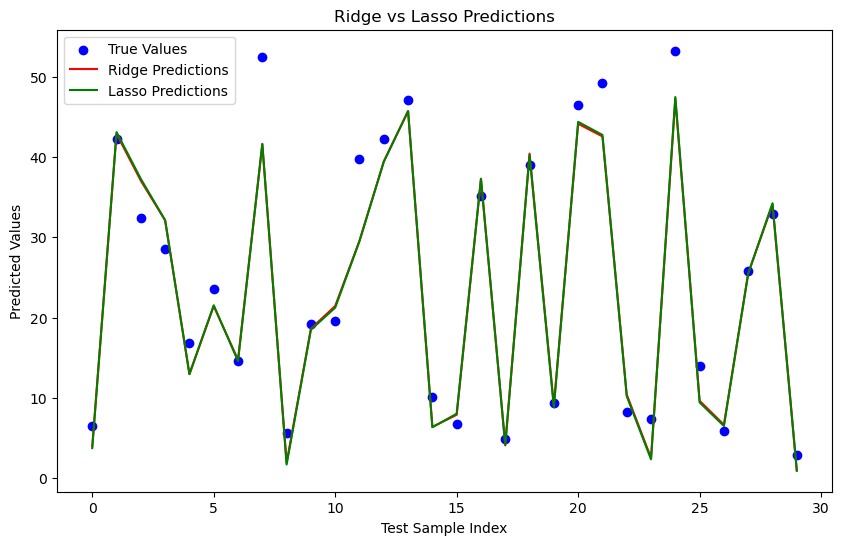

In [1]:
#Ridge and lasso regression are two types of regularization techniques used to reduce overfitting in linear regression models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#This will generate synthetic data.
np.random.seed(42)
X = np.random.rand(100, 1) * 10  
y = 5 * X.squeeze() + np.random.randn(100) * 5  


X = np.hstack([X, 0.8 * X + np.random.rand(100, 1) * 0.2])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#This will fit ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2 Score): {r2:.4f}")


evaluate_model("Ridge Regression", y_test, y_pred_ridge)


evaluate_model("Lasso Regression", y_test, y_pred_lasso)


print("\nModel Coefficients:")
print(f"Ridge Coefficients: {ridge.coef_}")
print(f"Lasso Coefficients: {lasso.coef_}")


plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="True Values")
plt.plot(range(len(y_test)), y_pred_ridge, color="red", label="Ridge Predictions")
plt.plot(range(len(y_test)), y_pred_lasso, color="green", label="Lasso Predictions")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Values")
plt.title("Ridge vs Lasso Predictions")
plt.legend()
plt.show()
